In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

Using Theano backend.


In [2]:
dataset = pd.read_csv('../datasets/mnist_data/train.csv')
dataset = dataset.values

In [3]:
X, y = dataset[:, 1:]/255, dataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

### Autoencoder

In [7]:
e = 64

inp = Input(shape=(784,))
emb = Dense(e, activation='sigmoid')(inp)
out = Dense(784, activation='sigmoid')(emb)

autoencoder = Model(inputs=inp, outputs=out)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [24]:
autoencoder.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])

In [25]:
hist = autoencoder.fit(
            X_train, X_train,
            epochs=20,
            shuffle=True,
            batch_size=512,
            validation_data=(X_test, X_test)
)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 1s 44us/step - loss: 0.0176 - acc: 0.0133 - val_loss: 0.0173 - val_acc: 0.0133
Epoch 2/20
33600/33600 [==============================] - 2s 46us/step - loss: 0.0169 - acc: 0.0132 - val_loss: 0.0169 - val_acc: 0.0130
Epoch 3/20
33600/33600 [==============================] - 1s 44us/step - loss: 0.0166 - acc: 0.0131 - val_loss: 0.0166 - val_acc: 0.0124
Epoch 4/20
33600/33600 [==============================] - 2s 46us/step - loss: 0.0163 - acc: 0.0133 - val_loss: 0.0163 - val_acc: 0.0137
Epoch 5/20
33600/33600 [==============================] - 2s 46us/step - loss: 0.0160 - acc: 0.0135 - val_loss: 0.0161 - val_acc: 0.0120
Epoch 6/20
33600/33600 [==============================] - 1s 41us/step - loss: 0.0158 - acc: 0.0130 - val_loss: 0.0159 - val_acc: 0.0124
Epoch 7/20
33600/33600 [==============================] - 2s 49us/step - loss: 0.0156 - acc: 0.0132 - val_loss: 0.0157 - val_acc:

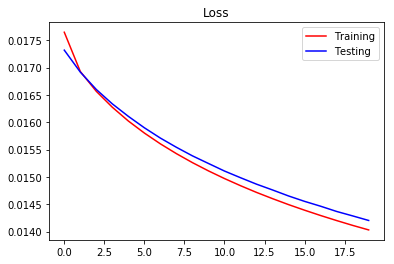

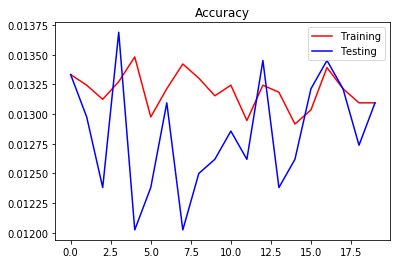

In [26]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()

In [27]:
test = X_test[:20]
preds = autoencoder.predict(test)
test.shape, preds.shape

((20, 784), (20, 784))

In [28]:
autoencoder.weights

[dense_2/kernel, dense_2/bias, dense_3/kernel, dense_3/bias]

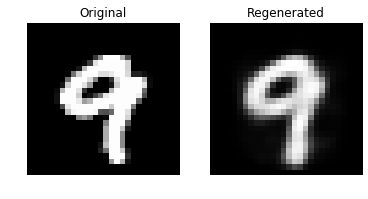

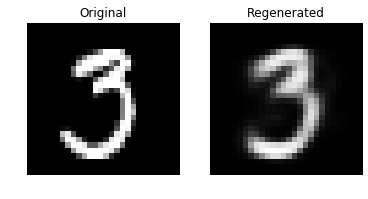

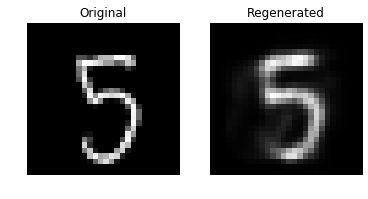

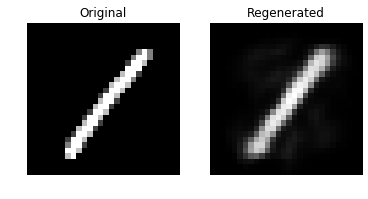

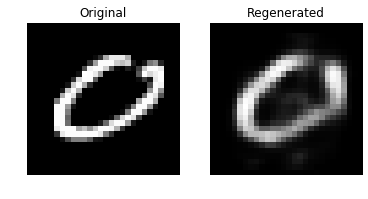

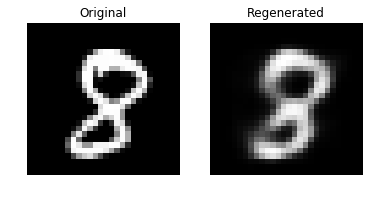

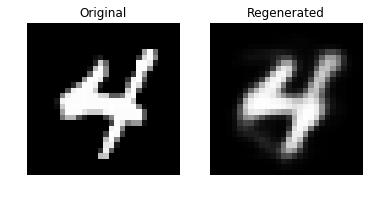

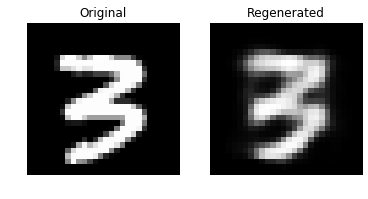

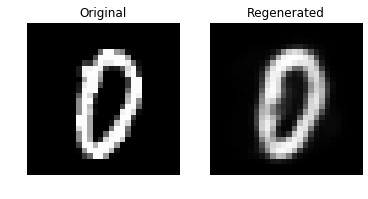

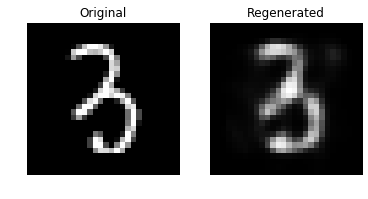

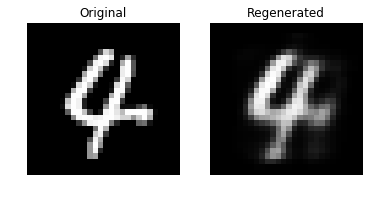

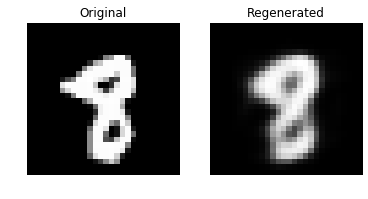

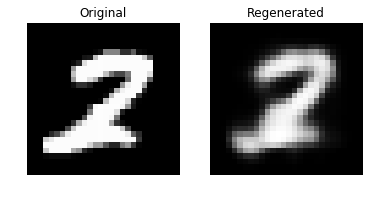

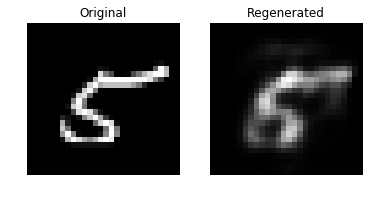

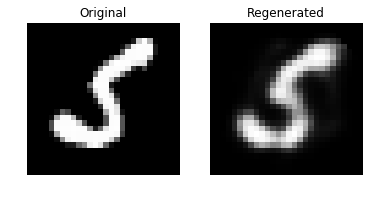

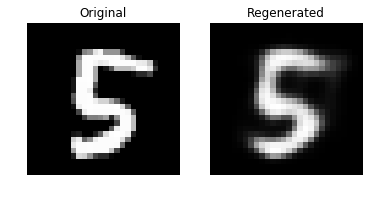

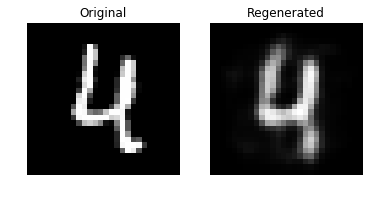

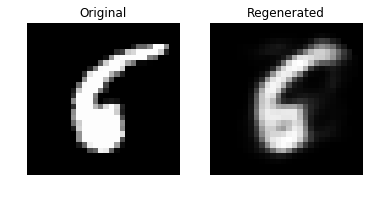

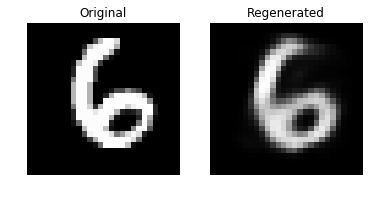

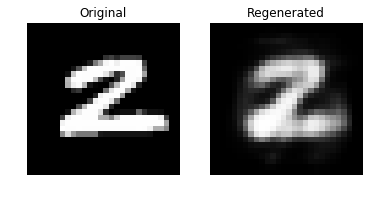

In [29]:
for i in range(test.shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(test[i].reshape((28,28)), cmap='gray')
    
    plt.subplot(1,2,2)
    plt.title('Regenerated')
    plt.axis('off')
    plt.imshow(preds[i].reshape((28,28)), cmap='gray')

In [30]:
autoencoder.layers

#### Encoder


In [36]:
encoder = Model(inputs=inp, outputs=emb)
encodings = encoder.predict(test)
encodings.shape

(20, 64)

#### Decoder


In [37]:
decoder_input = Input(shape=(e,))
decoder_output = Dense(784, activation='sigmoid')(decoder_input)

decoder = Model(inputs=decoder_input, outputs=decoder_output)

In [38]:
decodings = decoder.predict(encodings)
decodings.shape

(20, 784)

# PCA vs AE